# Machine Learning Classification Model

##### Creating Classification Models for data available on https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29

##### Trying to predict the chance of White-can-win ("won") and White-cannot-win ("nowin").


##### Describing the dataset: For more informations about how the dataset is organizated see in the file below:

In [1]:
#importing the first modules 
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

with open('dataset/kr-vs-kp.names','r') as arch:
    data_info=arch.readlines()
    for x in data_info:
        print(x)


1. Title: Chess End-Game -- King+Rook versus King+Pawn on a7

   (usually abbreviated KRKPA7).  The pawn on a7 means it is one square

   away from queening.  It is the King+Rook's side (white) to move.



2. Sources:

    (a) Database originally generated and described by Alen Shapiro.

    (b) Donor/Coder: Rob Holte (holte@uottawa.bitnet).  The database

        was supplied to Holte by Peter Clark of the Turing Institute

        in Glasgow (pete@turing.ac.uk).

    (c) Date: 1 August 1989



3. Past Usage:

     - Alen D. Shapiro (1983,1987), "Structured Induction in Expert Systems",

       Addison-Wesley.  This book is based on Shapiro's Ph.D. thesis (1983)

       at the University of Edinburgh entitled "The Role of Structured

       Induction in Expert Systems".

     - Stephen Muggleton (1987), "Structuring Knowledge by Asking Questions",

       pp.218-229 in "Progress in Machine Learning", edited by I. Bratko

       and Nada Lavrac, Sigma Press, Wilmslow, England  SK9 5BB.

In [2]:
#import the dataset used
data=pd.read_csv('dataset/kr-vs-kp.data',names=[x for x in range(0,37)])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [3]:
#Starting to convert the data in integer types to augment the processing 
from sklearn.preprocessing import LabelEncoder
trf=LabelEncoder()
data_converted=data.apply(lambda col: trf.fit_transform(col))
data_converted=data_converted.drop(36,axis=1)
data_converted.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


##### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_converted,data[36],
                                               random_state=0,test_size=0.15)

#### Importing the modules for classification


In [5]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
#Support Vector Machine and Kernellized Vector Machine
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#Decision Tree, Random Forests(parallel series learning) and 
#Gradient Boosting(Series of trees learning)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Naïves Bayes Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
#Neural Network and Beggining of deep learning classifier
from sklearn.neural_network import MLPClassifier

##### Importing Evaluation metrics

In [6]:
#Individual scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Complete tables
from sklearn.metrics import classification_report
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#ROC Curve
from sklearn.metrics import roc_curve, auc

### KNN model

In [7]:
knn_max_train=0
knn_max_test=0
i_max=0
for i in np.arange(1,31,1):
    knn= KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    #Avoiding overfitting
    if knn.score(X_test,y_test)>knn.score(X_train,y_train):
        if knn.score(X_test,y_test)>knn_max_test:
            knn_max_train=knn.score(X_train,y_train)
            knn_max_test=knn.score(X_test,y_test)
            i_max=i
        else:
            continue
    else:
        continue
print(f'The best number of neighbors is {i_max} with these scores:\n\
training:\t{knn_max_train:.3f}\ntest:\t\t{knn_max_test:.3f}')

The best number of neighbors is 8 with these scores:
training:	0.975
test:		0.979


###### Evaluation applicated to the model

<IPython.core.display.Javascript object>


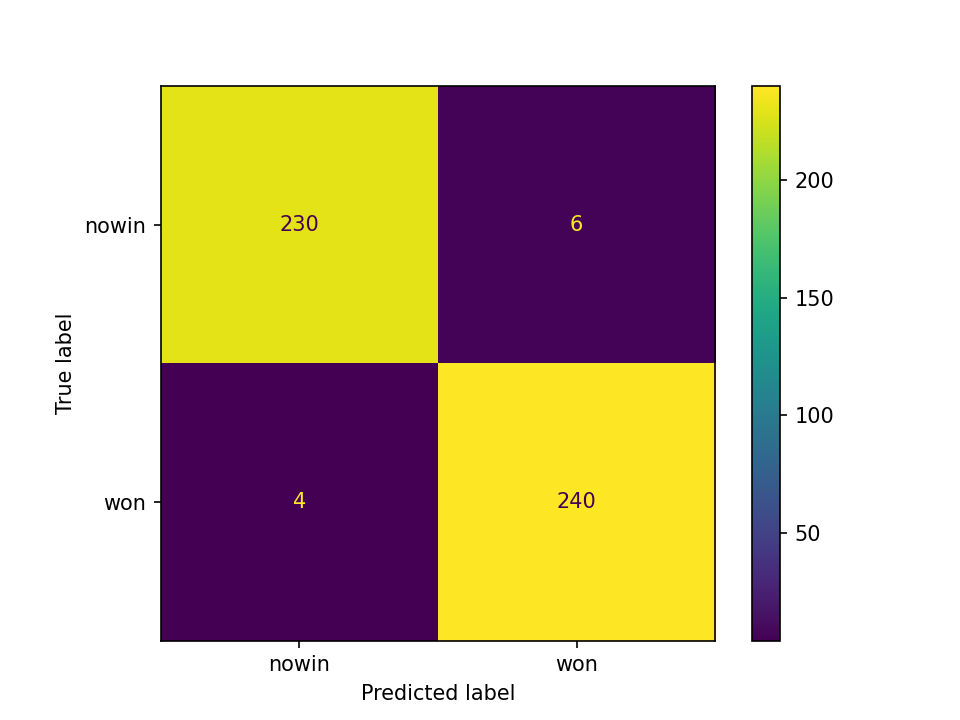

The confusion matrix for the model is:


In [8]:
#As we saw above the best number among the analysed was 8.
knn= KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)
predicted=knn.predict(X_test)
#converting the y_test and predicted labels to numbers to use the evaluation methods
def converting(label):
    if label=='won':
        return 1
    else:
        return 0
y_test_converted=list(map(converting,y_test.tolist()))
predicted_converted=list(map(converting,predicted))

#printing the confusion matrix
confusion = confusion_matrix(y_test, predicted)
print(f'The confusion matrix for the model is:\n {plot_confusion_matrix(knn,X_test,y_test)}')

In [9]:
print("Let's see the scores for the model in the right classification of some\
 aspects\n")
print('Accuracy:\t {:.5f}'.format(accuracy_score(y_test_converted, predicted_converted)))
print('Precision:\t {:.5f}'.format(precision_score(y_test_converted, predicted_converted)))
print('Recall:\t\t {:.5f}'.format(recall_score(y_test_converted, predicted_converted)))
print('F1:\t\t {:.5f}'.format(f1_score(y_test_converted, predicted_converted)))

Let's see the scores for the model in the right classification of some aspects

Accuracy:	 0.97917
Precision:	 0.97561
Recall:		 0.98361
F1:		 0.97959


<IPython.core.display.Javascript object>


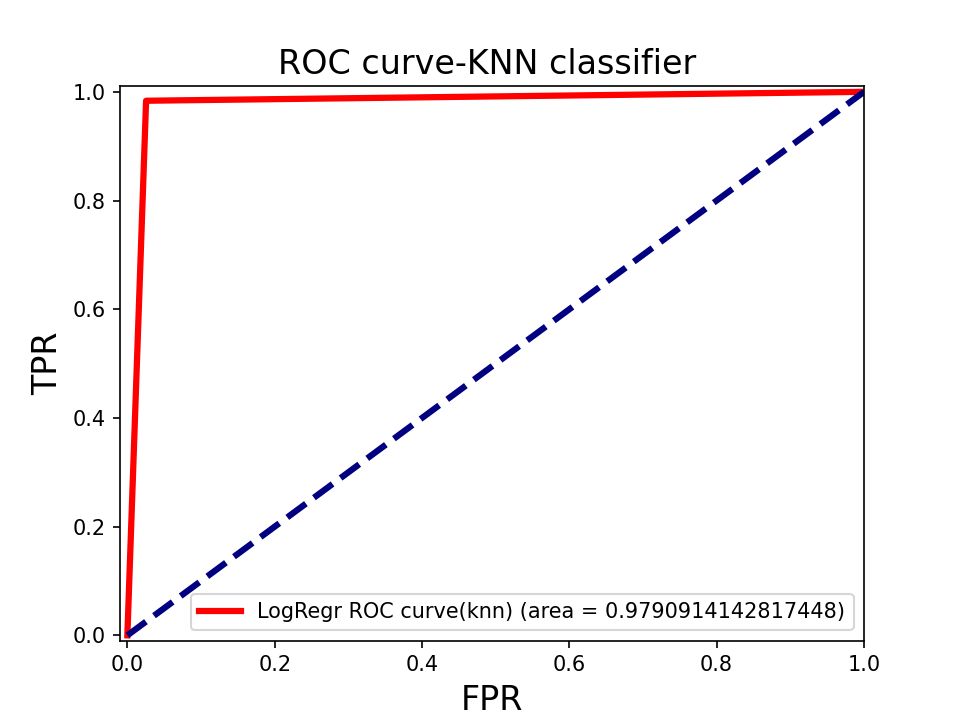

In [10]:
#Let's see the ROC curve for this model
fpr_lr, tpr_lr, _ = roc_curve(y_test_converted, predicted_converted)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr,'r', lw=3, label='LogRegr ROC curve(knn) (area = {:0})'.format(roc_auc_lr))
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC curve-KNN classifier ', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()


In [11]:
#With a 0.98 score in a ROC curve, we can see that the model it's ok.

### Logistic Regression

In [12]:
log_score_train_max=0
log_score_test_max=0
C=''
for this_c in np.arange(1,1001,5):
    logistic=LogisticRegression(penalty='l2',
                                C=this_c,random_state=0,
                                max_iter=1e6).fit(X_train, y_train)
    if logistic.score(X_test,y_test)>logistic.score(X_train,y_train):
        if logistic.score(X_test,y_test)>log_score_test_max:
            log_score_train_max=logistic.score(X_train,y_train)
            log_score_test_max=logistic.score(X_test,y_test)
            C=this_c
print(f'The best penalty is l2 with this value of C(regularization):{C}.\
Those generate the scores below:\n\
training:\t{log_score_train_max:.3f}\ntest:\t\t{log_score_test_max:.3f}')


The best penalty is l2 with this value of C(regularization):21.Those generate the scores below:
training:	0.976
test:		0.979


###### Evaluation applicated to the model

The confusion matrix for the model is:



<IPython.core.display.Javascript object>


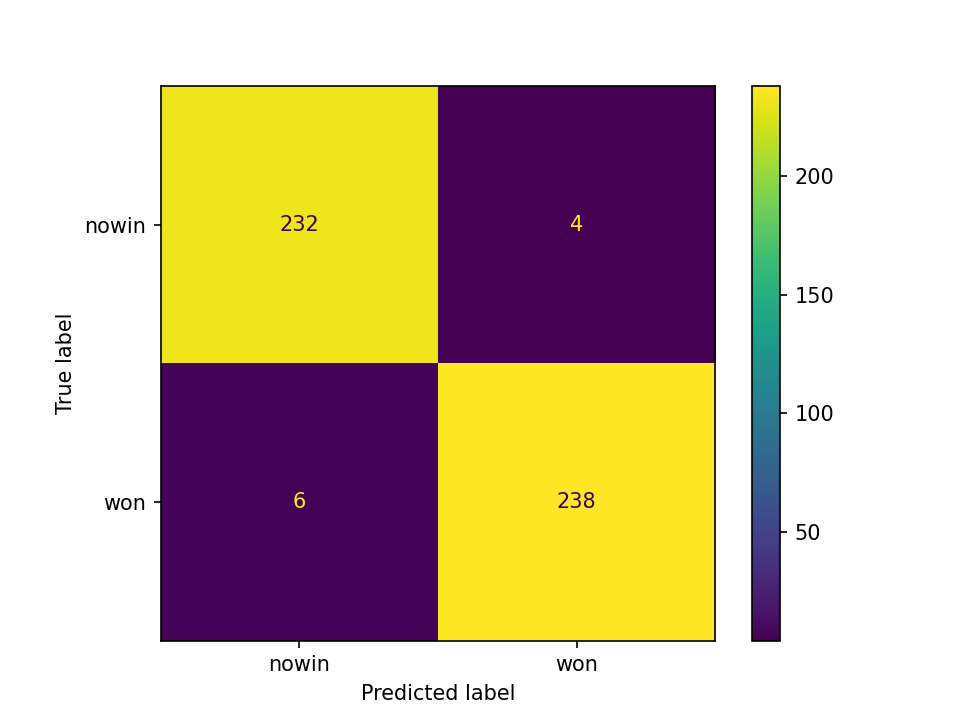

In [13]:
#printing the confusion matrix
logistic=LogisticRegression(penalty='l2',
                                C=21,random_state=0,
                                max_iter=1e6).fit(X_train, y_train)
predicted1=logistic.predict(X_test)
predicted1_converted=list(map(converting,predicted1))
confusion = confusion_matrix(y_test, predicted1)
print('The confusion matrix for the model is:\n')
plot_confusion_matrix(logistic,X_test,y_test)

In [14]:
print("Let's see the scores for the model in the right classification of some\
 aspects\n")
print('Accuracy:\t {:.5f}'.format(accuracy_score(y_test_converted, predicted1_converted)))
print('Precision:\t {:.5f}'.format(precision_score(y_test_converted, predicted1_converted)))
print('Recall:\t\t {:.5f}'.format(recall_score(y_test_converted, predicted1_converted)))
print('F1:\t\t {:.5f}'.format(f1_score(y_test_converted, predicted1_converted)))

Let's see the scores for the model in the right classification of some aspects

Accuracy:	 0.97917
Precision:	 0.98347
Recall:		 0.97541
F1:		 0.97942


<IPython.core.display.Javascript object>


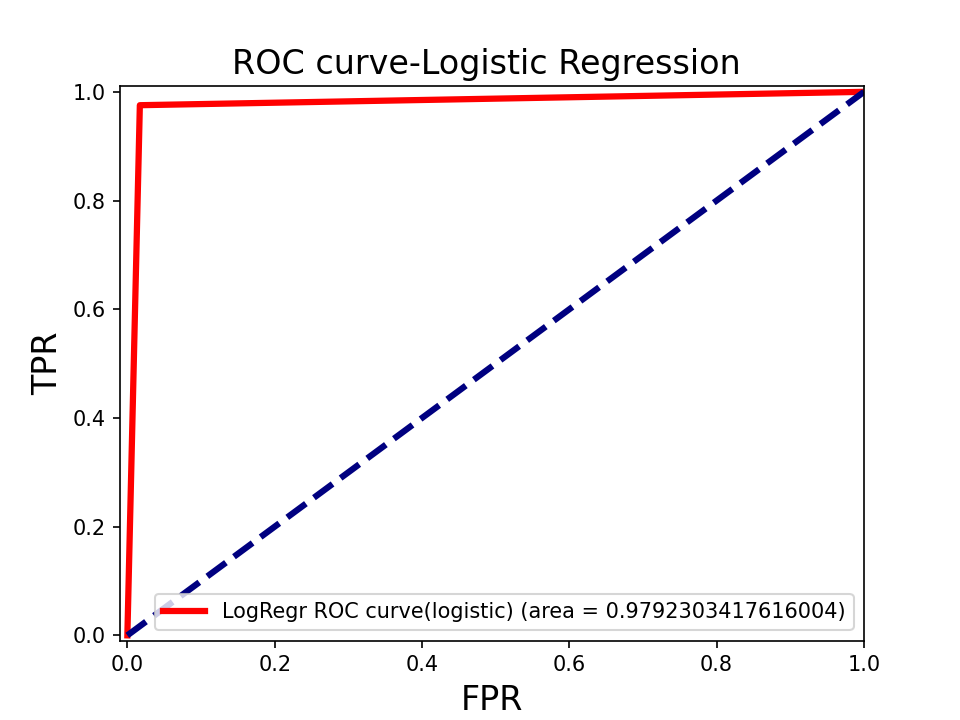

In [15]:
#Let's see the ROC curve for this model
fpr_lr, tpr_lr, _ = roc_curve(y_test_converted, predicted1_converted)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr,'r', lw=3, label='LogRegr ROC curve(logistic) (area = {:0})'.format(roc_auc_lr))
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC curve-Logistic Regression ', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()


In [ ]:
#Well, the scores of the Logistic Regression ae better than the KNN at least...

### Support Vector Machine Model

In [23]:
train_score=0
test_score=0
best_c=0
best_kernel=''
best_gamma=0

for this_c in [0.01,0.1,1,5,10,20,50,100]:
    for this_kernel in ['linear', 'rbf', 'sigmoid']:
        for this_gamma in [0.01,0.1,1,5,10,20,50,100]:
            svc_model = SVC(kernel = this_kernel, 
                            C=this_c,gamma=this_gamma,max_iter=100000,
                           random_state=0).fit(X_train, y_train)
            if svc_model.score(X_test,y_test)>svc_model.score(X_train,y_train):
                if svc_model.score(X_test,y_test)>test_score:
                    train_score=svc_model.score(X_train,y_train)
                    test_score=svc_model.score(X_test,y_test)
                    best_c=this_c
                    best_kernel=this_kernel
                    best_gamma=this_gamma
                else:
                    continue
            else:
                continue
print(f'With the follow kernel "{best_kernel}", and the values for\
 C: {best_c} and gamma: {best_gamma}, the best scores are below:\n\
training: {train_score}\t\t\ttest:{test_score}')
                    


With the follow kernel "rbf", and the values for C: 50 and gamma: 0.01, the best scores are below:
training: 0.9812223858615611			test:0.98125


###### Evaluation applicated to the model

The confusion matrix for the model is:



<IPython.core.display.Javascript object>


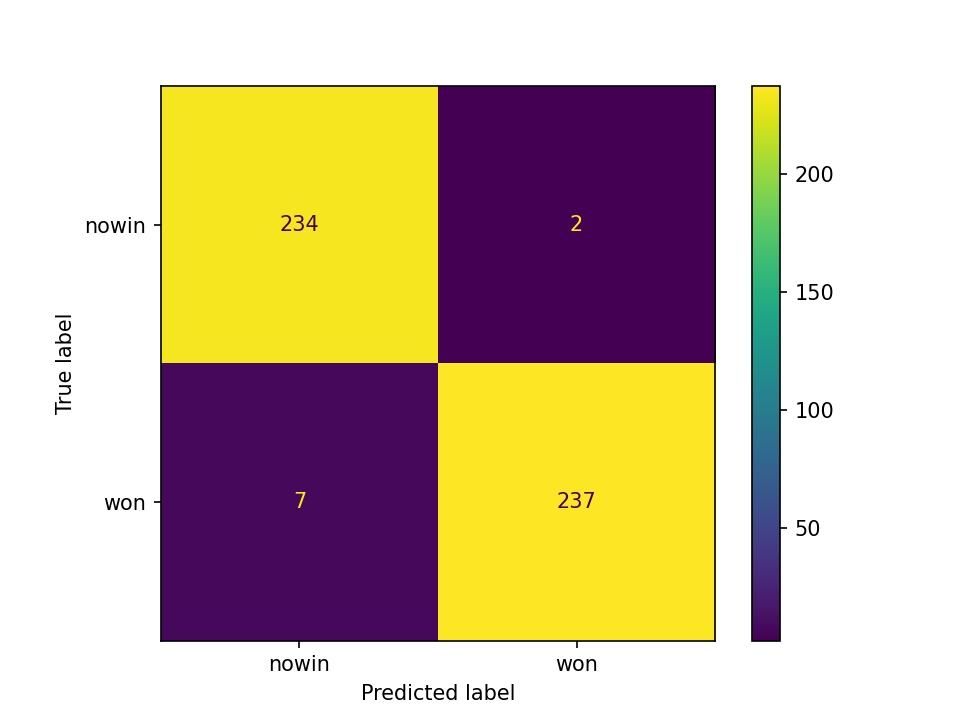

In [25]:
#printing the confusion matrix
svc_model = SVC(kernel = "rbf", 
                            C=50,gamma=0.01,max_iter=100000,
                           random_state=0).fit(X_train, y_train)
predicted2=svc_model.predict(X_test)
predicted2_converted=list(map(converting,predicted2))
confusion1 = confusion_matrix(y_test, predicted2)
print('The confusion matrix for the model is:\n')
plot_confusion_matrix(svc_model,X_test,y_test)

In [26]:
print("Let's see the scores for the model in the right classification of some\
 aspects\n")
print('Accuracy:\t {:.5f}'.format(accuracy_score(y_test_converted, predicted2_converted)))
print('Precision:\t {:.5f}'.format(precision_score(y_test_converted, predicted2_converted)))
print('Recall:\t\t {:.5f}'.format(recall_score(y_test_converted, predicted2_converted)))
print('F1:\t\t {:.5f}'.format(f1_score(y_test_converted, predicted2_converted)))

Let's see the scores for the model in the right classification of some aspects

Accuracy:	 0.98125
Precision:	 0.99163
Recall:		 0.97131
F1:		 0.98137


<IPython.core.display.Javascript object>


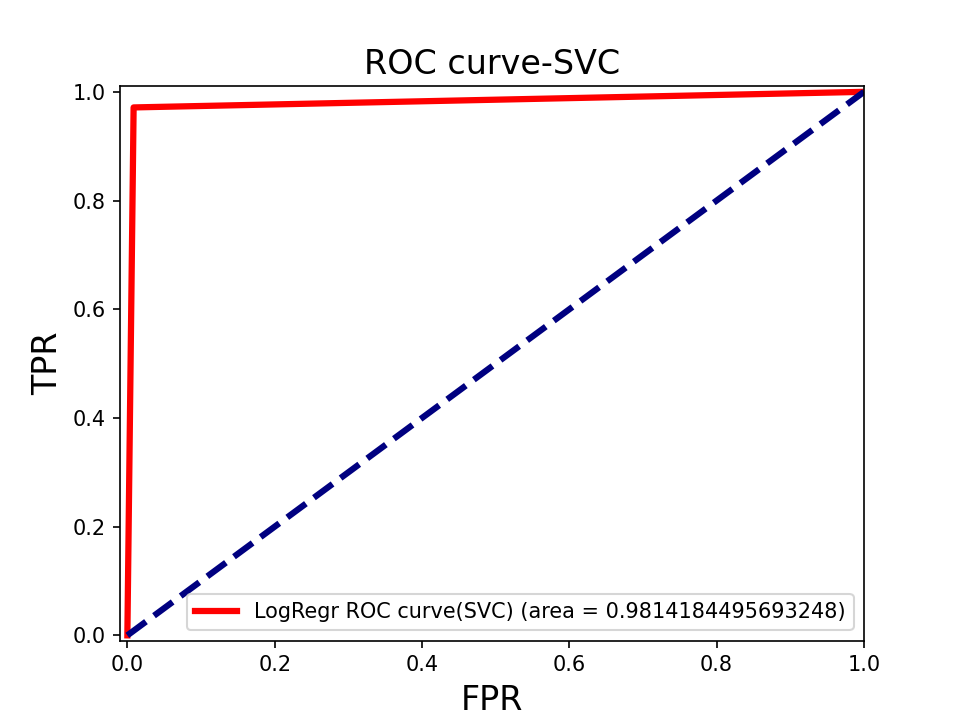

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(y_test_converted, predicted2_converted)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr,'r', lw=3, label='LogRegr ROC curve(SVC) (area = {:0})'.format(roc_auc_lr))
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.title('ROC curve-SVC', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()